In [1]:
#%matplotlib notebook
%matplotlib widget
import csv
import pandas as pd
import numpy as np
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#import mpld3
from PIL import Image
import random
from random import shuffle


In [2]:
folder = 'HPWREN_RESULTS'
file_names_path=os.path.join(folder,'checkpoint.txt')
f = open(file_names_path, 'r')
file_names = f.read()
f.close()

In [3]:
print(file_names)

/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20160604_FIRE_rm-n-mobo-c/1465063260_-02340.jpg
/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20160604_FIRE_rm-n-mobo-c/1465063500_-02100.jpg
/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20160604_FIRE_rm-n-mobo-c/1465063740_-01860.jpg
/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20160604_FIRE_rm-n-mobo-c/1465063920_-01680.jpg
/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20160604_FIRE_rm-n-mobo-c/1465064040_-01560.jpg
/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20160604_FIRE_rm-n-mobo-c/1465064100_-01500.jpg
/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20160604_FIRE_rm-n-mobo-c/1465064160_-01440.jpg
/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20160604_FIRE_rm-n-mobo-c/1465064580_-01020.jpg
/images/hpwren.ucsd.edu/hpwren.u

In [4]:
int_rep_path=os.path.join(folder,'internal_rep.pt')

int_rep=torch.load(int_rep_path)#[:100]

/tmp/ipykernel_1401189/907778120.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  int_rep=torch.load(int_rep_path)#[:100]


In [5]:
print(int_rep.shape)


torch.Size([19434, 5120])


In [6]:
embedd_int_rep = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(int_rep)

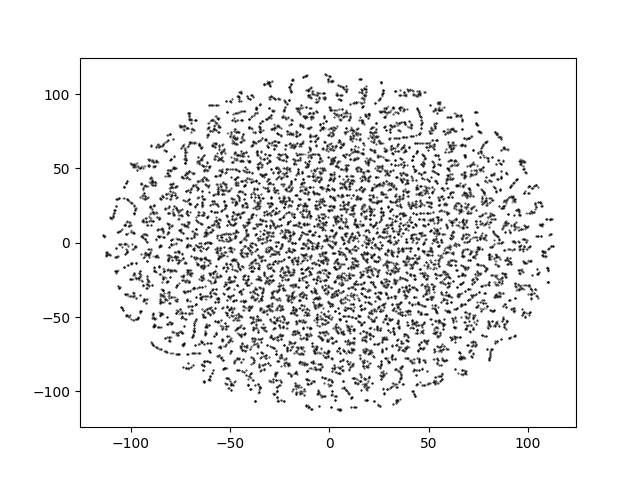

In [7]:
plt.scatter(embedd_int_rep[:,0], embedd_int_rep[:,1], alpha=0.5, color='black', s=0.2)
plt.show()

In [8]:
output_path=os.path.join(folder,'output.csv')

In [9]:
classification=[]
image_paths=[]
with open(output_path, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        print(row)
        classification.append(row)
        image_paths.append("." + row[0][:-1])

['/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20160604_FIRE_rm-n-mobo-c/1465063260_-02340.jpg,', '0']
['/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20160604_FIRE_rm-n-mobo-c/1465063500_-02100.jpg,', '0']
['/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20160604_FIRE_rm-n-mobo-c/1465063740_-01860.jpg,', '0']
['/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20160604_FIRE_rm-n-mobo-c/1465063920_-01680.jpg,', '0']
['/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20160604_FIRE_rm-n-mobo-c/1465064040_-01560.jpg,', '0']
['/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20160604_FIRE_rm-n-mobo-c/1465064100_-01500.jpg,', '0']
['/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20160604_FIRE_rm-n-mobo-c/1465064160_-01440.jpg,', '0']
['/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20160604

In [10]:
len(classification)

19434

In [11]:
# Assuming rgb.shape is (2580, 2) and len(classification) is 2580
x = embedd_int_rep[:, 0]  # Get the first column of rgb (x-coordinates)
y = embedd_int_rep[:, 1]  # Get the second column of rgb (y-coordinates)


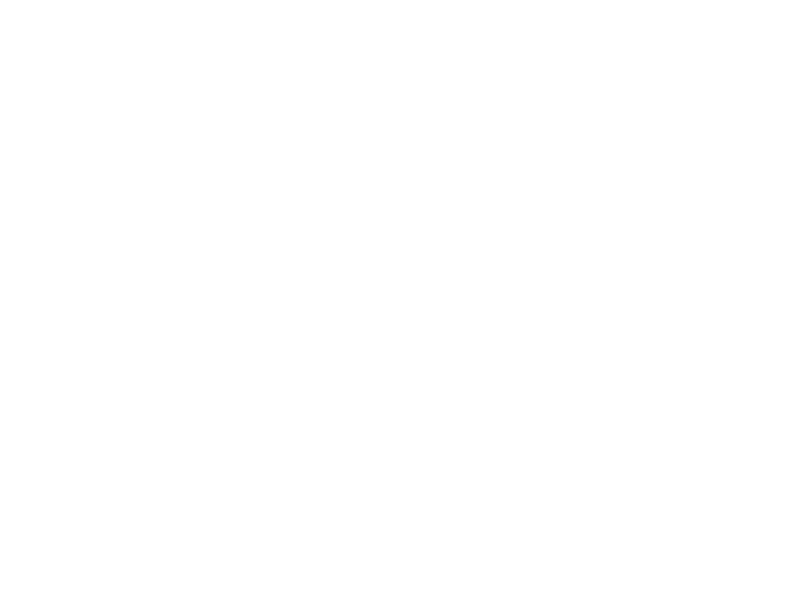

In [12]:
# Create a scatter plot
plt.figure(figsize=(8, 6))  # Set the figure size
colors = ['black', 'r']  # Define colors for the classes (red for 0, green for 1)


In [13]:
Classification=[]
for Class in classification:
    # print(Class[1])
    Classification.append(Class[1])

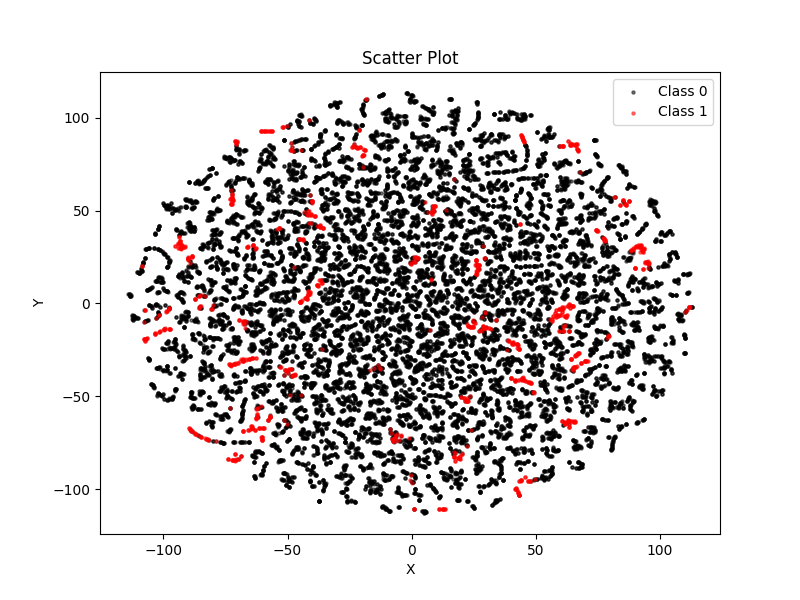

In [14]:
# Iterate over the unique labels and plot the points with corresponding colors
for label in [0, 1]:
    indices = [i for i, l in enumerate(Classification) if int(l[0]) == label]
    plt.scatter(x[indices], y[indices], c=colors[label], label=f'Class {label}', alpha=0.5, s=5)

plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [15]:
z = np.stack((x, y), axis=1)
z.shape

(19434, 2)

In [23]:
v=np.array([59.0,-3.8])
#v=np.array([-102.9,-46.0])

# Step 1: Broadcast V to match the shape of C
v_broadcasted = np.tile(v, (z.shape[0], 1))

# Step 2: Calculate the Euclidean distances
distances = np.linalg.norm(z - v_broadcasted, axis=1)

# Step 3: Find the indices of the 10 smallest distances
closest_indices = np.argsort(distances)[:20]

print(closest_indices)

[9835 9846 9833 9845 9747 9764 9815 9738 9736 9834 9812 9763 9824 9756
 9745 9732 9821 9822 9757 9816]


F-measure = 2*precision*recall / (precision+recall)

precision = TP/(TP+FP)  ,  recall = TP/(TP+FN)

['/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20190610_Pauma_bh-w-mobo-c/1560199816_+01696.jpg,', '1']
['/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20190610_Pauma_bh-w-mobo-c/1560199936_+01816.jpg,', '1']
['/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20190610_Pauma_bh-w-mobo-c/1560199696_+01576.jpg,', '1']
['/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20190610_Pauma_bh-w-mobo-c/1560199456_+01336.jpg,', '1']
['/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20190610_FIRE_bh-w-mobo-c/1560199936_+01800.jpg,', '1']
['/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20190610_FIRE_bh-w-mobo-c/1560199816_+01680.jpg,', '1']
['/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/20190610_Pauma_bh-w-mobo-c/1560199876_+01756.jpg,', '1']
['/images/hpwren.ucsd.edu/hpwren.ucsd.edu/HPWREN-FIgLib/HPWREN-FIgLib-Data/201

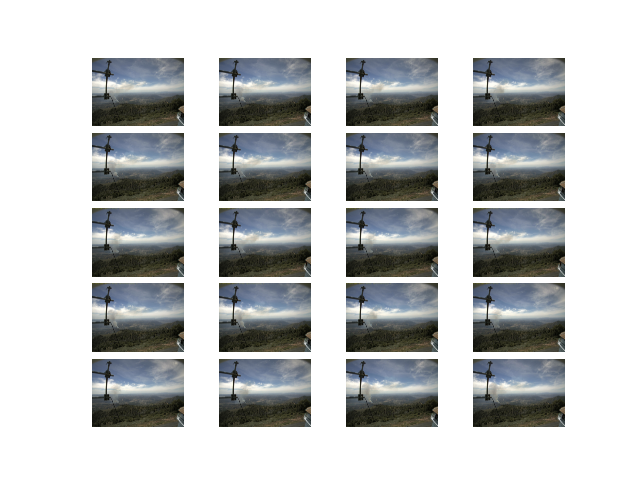

Fmeasure 
1.0


In [24]:
image_folder='HPWREN'
# Create a figure with a grid of subplots
num_rows = 5
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols)#, figsize=(20, 8))
TP=0
FP=0
FN=0
for i, index in enumerate(closest_indices):
    row = i // num_cols
    col = i % num_cols
    print(classification[index])
    GT=classification[index][0][-11]
    Pred=classification[index][1]
    image_path=classification[index][0][:-1]
    image = mpimg.imread(os.path.join(image_folder, os.path.relpath(image_path, '/images')))
    # image = mpimg.imread(os.path.join(image_folder,os.path.basename(image_path)))
    axes[row, col].imshow(image)
    axes[row, col].axis('off')

    if Pred == '1' and GT == '+':
        TP+=1
    elif Pred == '1' and GT == '-':
        FP+=1
    elif Pred == '0' and GT == '+':
        FN+=1

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Display the figure
plt.show()

if 2*TP+FP+FN == 0:
    print('Warnning! All predictions and labels are negative')
else:
    Fmeasure = 2*TP / (2*TP+FP+FN)
    print('Fmeasure ')
    print(Fmeasure)

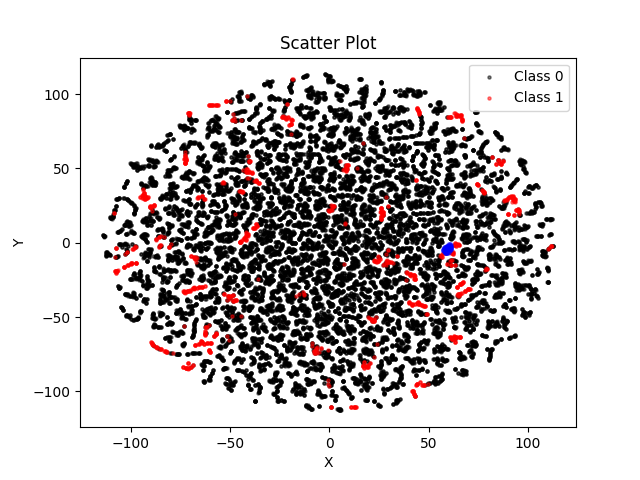

In [25]:
# Iterate over the unique labels and plot the points with corresponding colors
fig=plt.figure()
for label in [0, 1]:
    indices = [i for i, l in enumerate(Classification) if int(l[0]) == label]
    plt.scatter(x[indices], y[indices], c=colors[label], label=f'Class {label}', alpha=0.5, s=5)


plt.scatter(x[closest_indices], y[closest_indices], c='blue', alpha=0.5, s=15)

plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [19]:
TP=0
FP=0
FN=0
for element in classification:
    GT=element[0][-11]
    Pred=element[1]
    if Pred == '1' and GT == '+':
        TP+=1
    elif Pred == '1' and GT == '-':
        FP+=1
    elif Pred == '0' and GT == '+':
        FN+=1

if 2*TP+FP+FN == 0:
    print('Warnning! All predictions and labels are negative')
else:
    Fmeasure = 2*TP / (2*TP+FP+FN)
    print('Fmeasure ')
    print(Fmeasure)

Fmeasure 
0.19472129937246216


In [20]:
TP

1055

In [21]:
FP

0

In [22]:
FN

8726